## UAS Machine Learning

#### NAMA    : Zananda Aditya
#### NIM        : 090118194006

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")

In [4]:
df.head()
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
x = df.drop(columns="RiskLevel")
y = df.RiskLevel

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

In [7]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'])
])

In [8]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('algo', GaussianNB())])

In [10]:
pipeline.score(X_train, y_train)

0.5844636251541308

In [11]:
pipeline.score(X_test, y_test)

0.6798029556650246

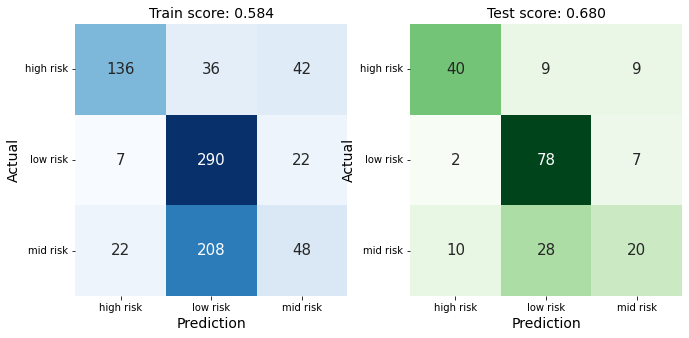

In [12]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [108]:
X_pred = pd.read_csv("data/datasettugass.csv")
X_pred

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,19,120,70,13.0,102,76
1,82,140,80,4.0,98,78
2,24,90,100,17.0,95,45
3,30,120,68,7.0,100,77
4,29,118,40,4.0,98,80
5,30,120,60,6.5,98,77
6,24,129,100,10.0,70,80
7,35,129,80,6.0,99,80
8,35,120,60,6.0,98,80
9,25,120,60,6.2,100,67


In [109]:
pipeline.predict(X_pred)

array(['high risk', 'high risk', 'high risk', 'low risk', 'mid risk',
       'low risk', 'high risk', 'mid risk', 'mid risk', 'mid risk',
       'high risk', 'low risk', 'mid risk', 'mid risk', 'low risk',
       'low risk', 'low risk', 'high risk', 'high risk', 'high risk',
       'low risk'], dtype='<U9')

In [110]:
X_pred["RiskLevel"] = pipeline.predict(X_pred)
X_pred

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,19,120,70,13.0,102,76,high risk
1,82,140,80,4.0,98,78,high risk
2,24,90,100,17.0,95,45,high risk
3,30,120,68,7.0,100,77,low risk
4,29,118,40,4.0,98,80,mid risk
5,30,120,60,6.5,98,77,low risk
6,24,129,100,10.0,70,80,high risk
7,35,129,80,6.0,99,80,mid risk
8,35,120,60,6.0,98,80,mid risk
9,25,120,60,6.2,100,67,mid risk
